# 김가네 팀플 (5) 머신러닝 - 랜덤포레스트_ 230622
- 팀원 별로 분담해서 분석 진행

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
pd.set_option('mode.chained_assignment',  None)

In [4]:
%%html
<style>
.output_stderr {
    display: none;
}
</style>

In [5]:
# 전처리 완료된 데이터 파일 불러오기
CS = pd.read_csv('../data/CS.csv', encoding='euc-kr')
CS.info()
CS

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20624 entries, 0 to 20623
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   view_cnt       20624 non-null  int64
 1   where_cnt      20624 non-null  int64
 2   attend_cnt     20624 non-null  int64
 3   volunteer_cnt  20624 non-null  int64
 4   history_cnt    20624 non-null  int64
 5   festival_cnt   20624 non-null  int64
 6   standard       20624 non-null  int64
 7   block          20624 non-null  int64
 8   expense        20624 non-null  int64
 9   expense_f      20624 non-null  int64
 10  difficulty     20624 non-null  int64
 11  intention      20624 non-null  int64
 12  history        20624 non-null  int64
 13  history_f      20624 non-null  int64
 14  festival       20624 non-null  int64
 15  festival_f     20624 non-null  int64
 16  sex            20624 non-null  int64
 17  age            20624 non-null  int64
 18  education      20624 non-null  int64
 19  marr

,view_cnt,where_cnt,attend_cnt,volunteer_cnt,history_cnt,festival_cnt,standard,block,expense,expense_f,...,festival,festival_f,sex,age,education,married,work,income,sido,disabled
0,49,0,0,0,5,0,1,1,14,14,...,2,6,2,5,3,1,5,3,1,1
1,3,3,3,0,1,0,2,6,14,9,...,2,7,2,5,3,2,5,7,1,1
2,6,0,0,0,0,0,2,1,8,15,...,2,4,1,2,3,1,5,6,1,1
3,22,12,2,0,0,0,1,2,14,14,...,2,5,2,4,4,2,5,5,1,1
4,16,3,2,0,2,0,2,1,14,14,...,2,4,2,3,4,1,1,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20619,59,7,0,0,5,1,4,3,12,12,...,1,6,2,4,4,2,1,6,1,1
20620,49,6,0,0,2,1,1,2,12,12,...,1,6,2,3,4,2,5,4,1,1
20621,4,0,0,0,0,0,1,2,17,12,...,2,4,1,5,4,2,2,6,1,1
20622,58,5,0,0,0,2,1,2,12,12,...,1,6,2,4,4,2,5,5,1,1


## 데이터 전처리
- 연령대는 50-60대(시니어)만 필터링
- 시도는 서울특별시-경기도(수도권)만 필터링

### 코드 기준 축소
- expense열과 expense_f열 카테고리가 너무 많은 것을 우려,  
- 같은 분야별로 코드 기준 축소

### 연속형 종속변수 범주형으로 변경
- view_cnt 열을 범주형으로 변경하여 진행

---

## 랜덤포레스트 분류 분석을 위해 추가 전처리
- 위의 전처리 과정은 군집화를 할 때 해줬던 전처리 과정과 동일
- 머신러닝 학습을 위해 문자열데이터는 다시 숫자로 레이블링 진행
- expense열과 expense_f열은 다시 코드 변경 함수 실행
- view_cnt 열은 pd.cut()이용하여 카테고리화 진행할 때 labels를 문자가 아니라 숫자로 변경

In [6]:
# 랜덤포레스트를 위한 데이터프레임 추출
CS_rf = CS.copy()
CS_rf

,view_cnt,where_cnt,attend_cnt,volunteer_cnt,history_cnt,festival_cnt,standard,block,expense,expense_f,...,festival,festival_f,sex,age,education,married,work,income,sido,disabled
0,49,0,0,0,5,0,1,1,14,14,...,2,6,2,5,3,1,5,3,1,1
1,3,3,3,0,1,0,2,6,14,9,...,2,7,2,5,3,2,5,7,1,1
2,6,0,0,0,0,0,2,1,8,15,...,2,4,1,2,3,1,5,6,1,1
3,22,12,2,0,0,0,1,2,14,14,...,2,5,2,4,4,2,5,5,1,1
4,16,3,2,0,2,0,2,1,14,14,...,2,4,2,3,4,1,1,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20619,59,7,0,0,5,1,4,3,12,12,...,1,6,2,4,4,2,1,6,1,1
20620,49,6,0,0,2,1,1,2,12,12,...,1,6,2,3,4,2,5,4,1,1
20621,4,0,0,0,0,0,1,2,17,12,...,2,4,1,5,4,2,2,6,1,1
20622,58,5,0,0,0,2,1,2,12,12,...,1,6,2,4,4,2,5,5,1,1


### 비용 지출 관련 2개 열 코드 기준 축소
- expense : 과거에 지출했던 문화예술행사 분야
- expense_f : 미래에 지출할 의향이 있는 분야

### 변경된 카테고리 info
- 1 : '문학/미술'
- 2 : '서양음악'
- 3 : '전통예술'
- 4 : '연극/뮤지컬'
- 5 : '무용'
- 6 : '영화'
- 7 : '대중음악'
- 8 : '기타'
- 9 : '해당사항없음'


In [7]:
# 축소 전 코드 기준
expense_words = {
    1:'문학',
    2:'미술',
    3:'서양음악',
    4:'전통예술',
    5:'연극/뮤지컬',
    6:'무용',
    7:'영화',
    8:'대중음악',
    9:'전시회',
    10:'서양음악',
    11:'전통예술',
    12:'연극/뮤지컬',
    13:'무용',
    14:'영화',
    15:'대중음악',
    16:'기타',
    17:'해당사항없음'
}

In [8]:
# 바꿀 코드 기준
expense_newctg = {
    1:'문학/미술',
    2:'문학/미술',
    3:'서양음악',
    4:'전통예술',
    5:'연극/뮤지컬',
    6:'무용',
    7:'영화',
    8:'대중음악',
    9:'문학/미술',
    10:'서양음악',
    11:'전통예술',
    12:'연극/뮤지컬',
    13:'무용',
    14:'영화',
    15:'대중음악',
    16:'기타',
    17:'해당사항없음'
}

In [9]:
# 코드 변경이 필요한 열 이름
need_setting_columns = [
    'expense',
    'expense_f'
]

In [10]:
# 코드값 변경이 필요한 열들의 변경 전 빈도값 출력
for column in need_setting_columns:
    CS_rf[column].value_counts(ascending=False)

expense
14    5771
17    5233
12    4786
5     1081
15     747
1      706
8      560
7      511
11     248
9      238
13     201
16     189
2       89
10      87
6       67
4       65
3       45
Name: count, dtype: int64

expense_f
12    5837
14    4724
15    2161
17    1801
1      876
5      780
9      745
11     740
13     687
8      570
16     459
7      440
10     297
6      166
4      135
2      129
3       77
Name: count, dtype: int64

In [11]:
# 위에서 만들어준 딕셔너리 하나의 리스트로 묶기
setting_codes = [expense_newctg, expense_newctg]

In [12]:
# 코드 변경 함수 선언
def get_list_setting_column(column, setting_prev_next):
    setting_done_list = []
    
    for code_value in column:
        setting_done_list.append(setting_prev_next[code_value])
    
    return setting_done_list

In [13]:
# 코드 변경이 필요한 모든 열에 대해 코드 변경
for i, column in enumerate(need_setting_columns):
    CS_rf[column] = get_list_setting_column(CS_rf[column], setting_codes[i])

In [14]:
# 코드값 변경이 필요한 열들의 변경 후 빈도값 출력
for column in need_setting_columns:
    CS_rf[column].value_counts(ascending=False)

expense
영화        6282
연극/뮤지컬    5867
해당사항없음    5233
대중음악      1307
문학/미술     1033
전통예술       313
무용         268
기타         189
서양음악       132
Name: count, dtype: int64

expense_f
연극/뮤지컬    6617
영화        5164
대중음악      2731
해당사항없음    1801
문학/미술     1750
전통예술       875
무용         853
기타         459
서양음악       374
Name: count, dtype: int64

### 머신러닝 학습을 위해 문자형 기준을 다시 수치형으로 변경!!
- '문학/미술' : 1
- '서양음악' : 2
- '전통예술' : 3
- '연극/뮤지컬' : 4
- '무용' : 5
- '영화' : 6
- '대중음악' : 7
- '기타' : 8
- '해당사항없음' : 9

In [15]:
# 코드 변경이 필요한 열 이름
need_setting_columns = [
    'expense',
    'expense_f'
]

In [16]:
# 다시 수치형으로 바꿀 코드 기준
expense_newctg_final = {
    '문학/미술' : 1,
    '서양음악' : 2,
    '전통예술' : 3,
    '연극/뮤지컬' : 4,
    '무용' : 5,
    '영화' : 6,
    '대중음악' : 7,
    '기타' : 8,
    '해당사항없음' : 9
}

In [17]:
# 위에서 만들어준 딕셔너리 하나의 리스트로 묶기
setting_codes = [expense_newctg_final, expense_newctg_final]

In [18]:
# 코드 변경이 필요한 모든 열에 대해 코드 변경
for i, column in enumerate(need_setting_columns):
    CS_rf[column] = get_list_setting_column(CS_rf[column], setting_codes[i])

In [19]:
# 코드값 변경이 필요한 열들의 변경 후 빈도값 출력
for column in need_setting_columns:
    CS_rf[column].value_counts(ascending=False)

expense
6    6282
4    5867
9    5233
7    1307
1    1033
3     313
5     268
8     189
2     132
Name: count, dtype: int64

expense_f
4    6617
6    5164
7    2731
9    1801
1    1750
3     875
5     853
8     459
2     374
Name: count, dtype: int64

In [20]:
# 범주 축소 완료된 데이터프레임 확인
CS_rf

,view_cnt,where_cnt,attend_cnt,volunteer_cnt,history_cnt,festival_cnt,standard,block,expense,expense_f,...,festival,festival_f,sex,age,education,married,work,income,sido,disabled
0,49,0,0,0,5,0,1,1,6,6,...,2,6,2,5,3,1,5,3,1,1
1,3,3,3,0,1,0,2,6,6,1,...,2,7,2,5,3,2,5,7,1,1
2,6,0,0,0,0,0,2,1,7,7,...,2,4,1,2,3,1,5,6,1,1
3,22,12,2,0,0,0,1,2,6,6,...,2,5,2,4,4,2,5,5,1,1
4,16,3,2,0,2,0,2,1,6,6,...,2,4,2,3,4,1,1,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20619,59,7,0,0,5,1,4,3,4,4,...,1,6,2,4,4,2,1,6,1,1
20620,49,6,0,0,2,1,1,2,4,4,...,1,6,2,3,4,2,5,4,1,1
20621,4,0,0,0,0,0,1,2,9,4,...,2,4,1,5,4,2,2,6,1,1
20622,58,5,0,0,0,2,1,2,4,4,...,1,6,2,4,4,2,5,5,1,1


### 기타 전처리 진행
- 연령대는 50-60대(시니어)만 필터링
- 시도는 서울특별시-경기도(수도권)만 필터링

In [21]:
# 연령대 50, 60대만 포함
CS_rf = CS_rf[(CS_rf['age'] == 5) | (CS_rf['age'] == 6)]

In [22]:
# 시도 서울, 경기만 포함
CS_rf = CS_rf[(CS_rf['sido'] == 1) | (CS_rf['sido'] == 9)]

### 머신러닝 학습 전 최종 전처리 완료된 데이터프레임 확인
- 데이터 개수 :  2144

In [23]:
CS_rf

,view_cnt,where_cnt,attend_cnt,volunteer_cnt,history_cnt,festival_cnt,standard,block,expense,expense_f,...,festival,festival_f,sex,age,education,married,work,income,sido,disabled
0,49,0,0,0,5,0,1,1,6,6,...,2,6,2,5,3,1,5,3,1,1
1,3,3,3,0,1,0,2,6,6,1,...,2,7,2,5,3,2,5,7,1,1
6,22,15,0,0,0,0,2,2,6,6,...,2,5,2,5,4,3,1,5,1,1
7,10,0,0,0,2,2,2,4,9,3,...,1,6,1,5,4,2,1,6,1,1
9,7,0,0,0,0,0,3,2,7,4,...,2,5,2,5,3,2,1,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20595,21,0,0,0,0,0,5,4,4,4,...,2,5,1,5,4,2,1,3,9,1
20599,23,0,0,0,1,0,1,1,9,4,...,2,5,2,5,3,2,1,6,9,1
20605,30,1,0,0,1,0,4,1,7,7,...,2,4,2,6,2,2,3,4,9,1
20618,7,2,0,0,4,0,1,2,8,8,...,2,5,2,5,3,2,3,6,1,1


---

## 랜덤포레스트 학습 및 예측 진행
1. train_test_split 이용해서 train 데이터와 test 데이터 나누기
2. 의사결정나무(결정트리) 먼저 사용해서 모델 성능(정확도) 확인
3. 랜덤포레스트 사용해서 모델 성능(정확도)확인

---
## Target 데이터 범주 축소 : 8개 --> 3개
- 타겟 범주 기준 통일
- [상, 중, 하] 총 3개의 카테고리로 관람횟수(참여도) 범주 분리
- 참여도(하) : 최솟값 ~ 제 1 사분위수
- 참여도(중) : 제 1 사분위수 ~ 평균
- 참여도(상) : 평균 ~ 최댓값

In [24]:
# 기존 데이터에 대한 기초통계량 출력
CS['view_cnt'].describe()

count    20624.000000
mean        25.158505
std         37.865832
min          0.000000
25%          7.000000
50%         15.000000
75%         29.000000
max        730.000000
Name: view_cnt, dtype: float64

In [25]:
# target 범주화
target_min = min(CS['view_cnt'])
target_max = max(CS['view_cnt'])

target_ranges = [target_min-1, 7, 25, target_max]
labels = [1, 2, 3]
CS_rf['target'] = pd.cut(CS['view_cnt'], bins=target_ranges, labels=labels)

In [26]:
# 범주화 확인
CS_rf['target'].value_counts().sort_index()

target
1    743
2    967
3    434
Name: count, dtype: int64

### train, test 데이터 분리
### 분리 전 'sido', 'age' 열 삭제!!

In [27]:
# 분리 전 데이터프레임 확인
CS_rf

,view_cnt,where_cnt,attend_cnt,volunteer_cnt,history_cnt,festival_cnt,standard,block,expense,expense_f,...,festival_f,sex,age,education,married,work,income,sido,disabled,target
0,49,0,0,0,5,0,1,1,6,6,...,6,2,5,3,1,5,3,1,1,3
1,3,3,3,0,1,0,2,6,6,1,...,7,2,5,3,2,5,7,1,1,1
6,22,15,0,0,0,0,2,2,6,6,...,5,2,5,4,3,1,5,1,1,2
7,10,0,0,0,2,2,2,4,9,3,...,6,1,5,4,2,1,6,1,1,2
9,7,0,0,0,0,0,3,2,7,4,...,5,2,5,3,2,1,5,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20595,21,0,0,0,0,0,5,4,4,4,...,5,1,5,4,2,1,3,9,1,2
20599,23,0,0,0,1,0,1,1,9,4,...,5,2,5,3,2,1,6,9,1,2
20605,30,1,0,0,1,0,4,1,7,7,...,4,2,6,2,2,3,4,9,1,3
20618,7,2,0,0,4,0,1,2,8,8,...,5,2,5,3,2,3,6,1,1,1


In [28]:
# 피처 데이터 세트 / 타겟 데이터 세트 만들기
CS_X_df = CS_rf.drop(columns=['view_cnt', 'target', 'sido', 'age'], axis=1)
CS_y_df = CS_rf['target']

# 피쳐 데이터 세트 / 타겟 데이터 세트 확인
CS_X_df
CS_y_df

,where_cnt,attend_cnt,volunteer_cnt,history_cnt,festival_cnt,standard,block,expense,expense_f,difficulty,...,history,history_f,festival,festival_f,sex,education,married,work,income,disabled
0,0,0,0,5,0,1,1,6,6,3,...,1,6,2,6,2,3,1,5,3,1
1,3,3,0,1,0,2,6,6,1,1,...,1,7,2,7,2,3,2,5,7,1
6,15,0,0,0,0,2,2,6,6,5,...,2,4,2,5,2,4,3,1,5,1
7,0,0,0,2,2,2,4,9,3,2,...,1,6,1,6,1,4,2,1,6,1
9,0,0,0,0,0,3,2,7,4,2,...,2,5,2,5,2,3,2,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20595,0,0,0,0,0,5,4,4,4,1,...,2,5,2,5,1,4,2,1,3,1
20599,0,0,0,1,0,1,1,9,4,1,...,1,4,2,5,2,3,2,1,6,1
20605,1,0,0,1,0,4,1,7,7,2,...,1,5,2,4,2,2,2,3,4,1
20618,2,0,0,4,0,1,2,8,8,2,...,1,6,2,5,2,3,2,3,6,1


0        3
1        1
6        2
7        2
9        1
        ..
20595    2
20599    2
20605    3
20618    1
20621    1
Name: target, Length: 2144, dtype: category
Categories (3, int64): [1 < 2 < 3]

In [29]:
# 학습 / 테스트 데이터 세트 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(CS_X_df,
                                                   CS_y_df,
                                                   test_size=0.3,
                                                   random_state=11)

In [30]:
# 랜덤포레스트 모델 생성
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_clf = RandomForestClassifier(random_state=0, n_estimators=300)

rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

print('랜덤 포레스트 예측 정확도 : {0:.4f}'.format(accuracy_score(y_test, y_pred)))

RandomForestClassifier(n_estimators=300, random_state=0)

랜덤 포레스트 예측 정확도 : 0.5404


### 범주 축소된 모델로 하이퍼 파라미터 튜닝 진행

In [31]:
# # 하이퍼 파라미터 튜닝 
# from sklearn.model_selection import GridSearchCV

# params = {
#     'n_estimators' : [100, 200, 300],
#     'max_depth' : [5,6,7,8],
#     'min_samples_split' : [4,5,6],
#     'min_samples_leaf' : [2,3,4]
# }

# grid_rclf = GridSearchCV(rf_clf, param_grid=params, scoring='accuracy', cv=5)

# grid_rclf.fit(X_train, y_train)

# print('최적 하이퍼 파라미터 : ', grid_rclf.best_params_)
# print('최적 하이퍼 파라미터의 최고 정확도 : {0:.4f}'.format(grid_rclf.best_score_))

# best_rclf = grid_rclf.best_estimator_

# y_pred = best_rclf.predict(X_test)

# print('튜닝 후 정확도 : {0:.4f}'.format(accuracy_score(y_test, y_pred)))

In [32]:
# 최적 하이퍼 파라미터 :  {'max_depth': 8, 'min_samples_leaf': 6, 'min_samples_split': 6, 'n_estimators': 100}
# 최적 하이퍼 파라미터의 최고 정확도 : 0.5133
# 튜닝 후 정확도 : 0.5450

In [33]:
# 최적 하이퍼 파라미터 :  {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 200}
# 최적 하이퍼 파라미터의 최고 정확도 : 0.5180
# 튜닝 후 정확도 : 0.5466

#### 튜닝된 하이퍼 파라미터로 다시 학습/예측/평가 수행

In [34]:
rf_clf = RandomForestClassifier(n_estimators=200,
                                max_depth=7,
                               min_samples_leaf=2,
                               min_samples_split=4)

rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

print('최적 정확도 : {0:.4f}'.format(accuracy_score(y_test, y_pred)))

RandomForestClassifier(max_depth=7, min_samples_leaf=2, min_samples_split=4,
                       n_estimators=200)

최적 정확도 : 0.5357


### 개별 feature들의 중요도 시각화

<Axes: >

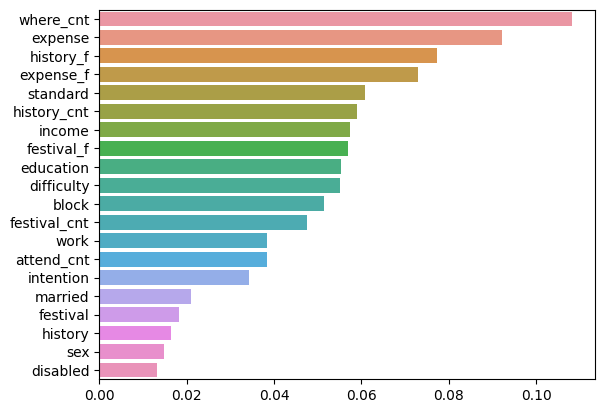

In [35]:
# 피처 중요도가 높은 20개의 피처만 
f_imp = rf_clf.feature_importances_
feature_importances = pd.Series(f_imp, index=X_train.columns).sort_values(ascending=False)
feature_importances = feature_importances[:20]

sns.barplot(x=feature_importances, y=feature_importances.index)

#### 가장 변별력이 높은 feature는 소득(income)이다.

## 예측값 데이터셋에 가공열로 추가

In [36]:
# 예측값 생성
y_pred = rf_clf.predict(CS_X_df)

In [37]:
# 저장할 데이터셋 복사
CS_pred = CS.copy()

In [38]:
CS_pred

,view_cnt,where_cnt,attend_cnt,volunteer_cnt,history_cnt,festival_cnt,standard,block,expense,expense_f,...,festival,festival_f,sex,age,education,married,work,income,sido,disabled
0,49,0,0,0,5,0,1,1,14,14,...,2,6,2,5,3,1,5,3,1,1
1,3,3,3,0,1,0,2,6,14,9,...,2,7,2,5,3,2,5,7,1,1
2,6,0,0,0,0,0,2,1,8,15,...,2,4,1,2,3,1,5,6,1,1
3,22,12,2,0,0,0,1,2,14,14,...,2,5,2,4,4,2,5,5,1,1
4,16,3,2,0,2,0,2,1,14,14,...,2,4,2,3,4,1,1,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20619,59,7,0,0,5,1,4,3,12,12,...,1,6,2,4,4,2,1,6,1,1
20620,49,6,0,0,2,1,1,2,12,12,...,1,6,2,3,4,2,5,4,1,1
20621,4,0,0,0,0,0,1,2,17,12,...,2,4,1,5,4,2,2,6,1,1
20622,58,5,0,0,0,2,1,2,12,12,...,1,6,2,4,4,2,5,5,1,1


In [39]:
# 연령대 50, 60대만 포함
CS_pred = CS_pred[(CS_pred['age'] == 5) | (CS_pred['age'] == 6)]

In [40]:
# 시도 서울, 경기만 포함
CS_pred = CS_pred[(CS_pred['sido'] == 1) | (CS_pred['sido'] == 9)]

In [41]:
# 예측값 가공열 생성
CS_pred['pred'] = y_pred

In [42]:
# 타겟값 가공열 생성
CS_pred['target'] = CS_y_df

In [43]:
# 머신러닝 완료된 최종 데이터프레임 확인
CS_pred

,view_cnt,where_cnt,attend_cnt,volunteer_cnt,history_cnt,festival_cnt,standard,block,expense,expense_f,...,sex,age,education,married,work,income,sido,disabled,pred,target
0,49,0,0,0,5,0,1,1,14,14,...,2,5,3,1,5,3,1,1,2,3
1,3,3,3,0,1,0,2,6,14,9,...,2,5,3,2,5,7,1,1,2,1
6,22,15,0,0,0,0,2,2,14,14,...,2,5,4,3,1,5,1,1,2,2
7,10,0,0,0,2,2,2,4,17,11,...,1,5,4,2,1,6,1,1,2,2
9,7,0,0,0,0,0,3,2,15,12,...,2,5,3,2,1,5,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20595,21,0,0,0,0,0,5,4,12,12,...,1,5,4,2,1,3,9,1,2,2
20599,23,0,0,0,1,0,1,1,17,12,...,2,5,3,2,1,6,9,1,1,2
20605,30,1,0,0,1,0,4,1,8,8,...,2,6,2,2,3,4,9,1,2,3
20618,7,2,0,0,4,0,1,2,16,16,...,2,5,3,2,3,6,1,1,2,1


In [44]:
# 파일로 저장
# CS_pred.to_csv('CS_pred.csv', index=False)